<h1>Capstone 1: Data Storytelling</h1>
<h2>Wine Quality Data Set, UC Irvine</h2> 
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)
<h4>Audrey Rager</h4>

<h2>Import Python Packages</h2>

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
#from sklearn import cross_validation
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline



<h2>Data Wrangling</h2>

In [2]:
#Import csv files into Pandas data frames
reddf = pd.read_csv('winequality-red.csv',sep=";")
whitedf = pd.read_csv('winequality-white.csv',sep=";")


In [3]:
#Look at the first few records of the Red Wine data
reddf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Look at the first few records of the White Wine data
whitedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#Look at info for the Red Wine data
reddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Look at info for the White Wine data
whitedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
# Look at the dimensions of each data set
print("The Red wine dataset has", reddf.shape[0], "observations and", 
      reddf.shape[1], "variables")
print("The White wine dataset has", whitedf.shape[0], "observations and",
      whitedf.shape[1], "variables")

The Red wine dataset has 1599 observations and 12 variables
The White wine dataset has 4898 observations and 12 variables


In [8]:
#Check for null values in Red Wine data
reddf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# Check for missing values in the White Wine data 
whitedf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<h2>Descriptive Statitics</h2>

In [10]:
#Descriptive Statistics for Red Wine Data
reddf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
#Descriptive Statistics for White Wine Data
whitedf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


"Quality" is the attribute we want to be able to predict using the other attributes.  Because it is a categorical variable, mode and median are more meaningful than mean. Let's look more at the values for 'quality' in each data set.

In [12]:
reddf['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [13]:
reddf.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [14]:
whitedf['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [15]:
whitedf.quality.value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

Red Wine Quality


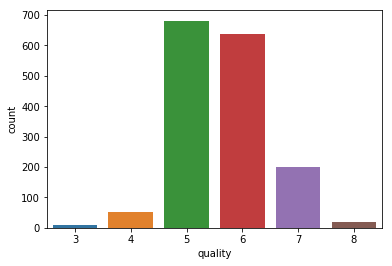

In [16]:
#Histogram of Red Wine Quality
print('Red Wine Quality')
sns.countplot(x='quality', data=reddf)

White Wine Quality


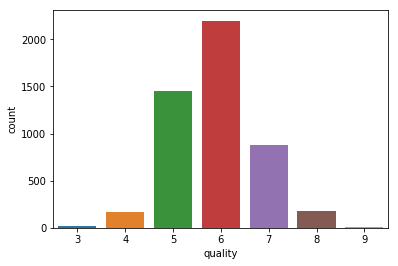

In [17]:
#Histogram of White Wine Quality
print('White Wine Quality')
sns.countplot(x='quality', data=whitedf)

In [18]:
#Reassign Red Wine Quality to Rating
conditions = [
    (reddf['quality'] >= 7),
    (reddf['quality'] <= 4)
]

rating = ['superior', 'inferior']
reddf['rating'] = np.select(conditions, rating, default='fine')
reddf.rating.value_counts()

fine        1319
superior     217
inferior      63
Name: rating, dtype: int64

Red Wine Quality


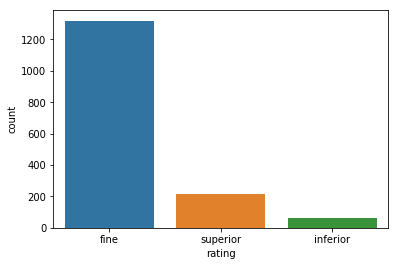

In [19]:
#Histogram of Red Wine Rating
print('Red Wine Quality')
sns.countplot(x='rating', data=reddf)

In [20]:
#Reassign White Wine Quality to Rating
conditions = [
    (whitedf['quality'] >= 7),
    (whitedf['quality'] <= 4)
]

rating = ['superior', 'inferior']
whitedf['rating'] = np.select(conditions, rating, default='fine')
whitedf.rating.value_counts()

fine        3655
superior    1060
inferior     183
Name: rating, dtype: int64

White Wine Quality


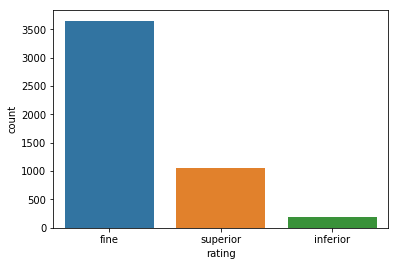

In [21]:
#Histogram of White Wine Rating
print('White Wine Quality')
sns.countplot(x='rating', data=whitedf)

In [22]:
#Group Red Wine by Rating and show mean of attributes
reddf.groupby(['rating']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
fine,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
inferior,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
superior,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


In [23]:
#Group White Wine by Rating and show mean of attributes
whitedf.groupby(['rating']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
fine,6.876060,0.277086,0.337877,6.797729,0.047740,35.962107,142.571272,0.994480,3.180720,0.487557,10.269808,5.601368
inferior,7.180874,0.375984,0.307705,4.821038,0.050557,26.633880,130.232240,0.994343,3.183388,0.475956,10.173497,3.890710
superior,6.725142,0.265349,0.326057,5.261509,0.038160,34.550472,125.245283,0.992412,3.215132,0.500142,11.416022,7.174528


<h2>Histograms</h2>

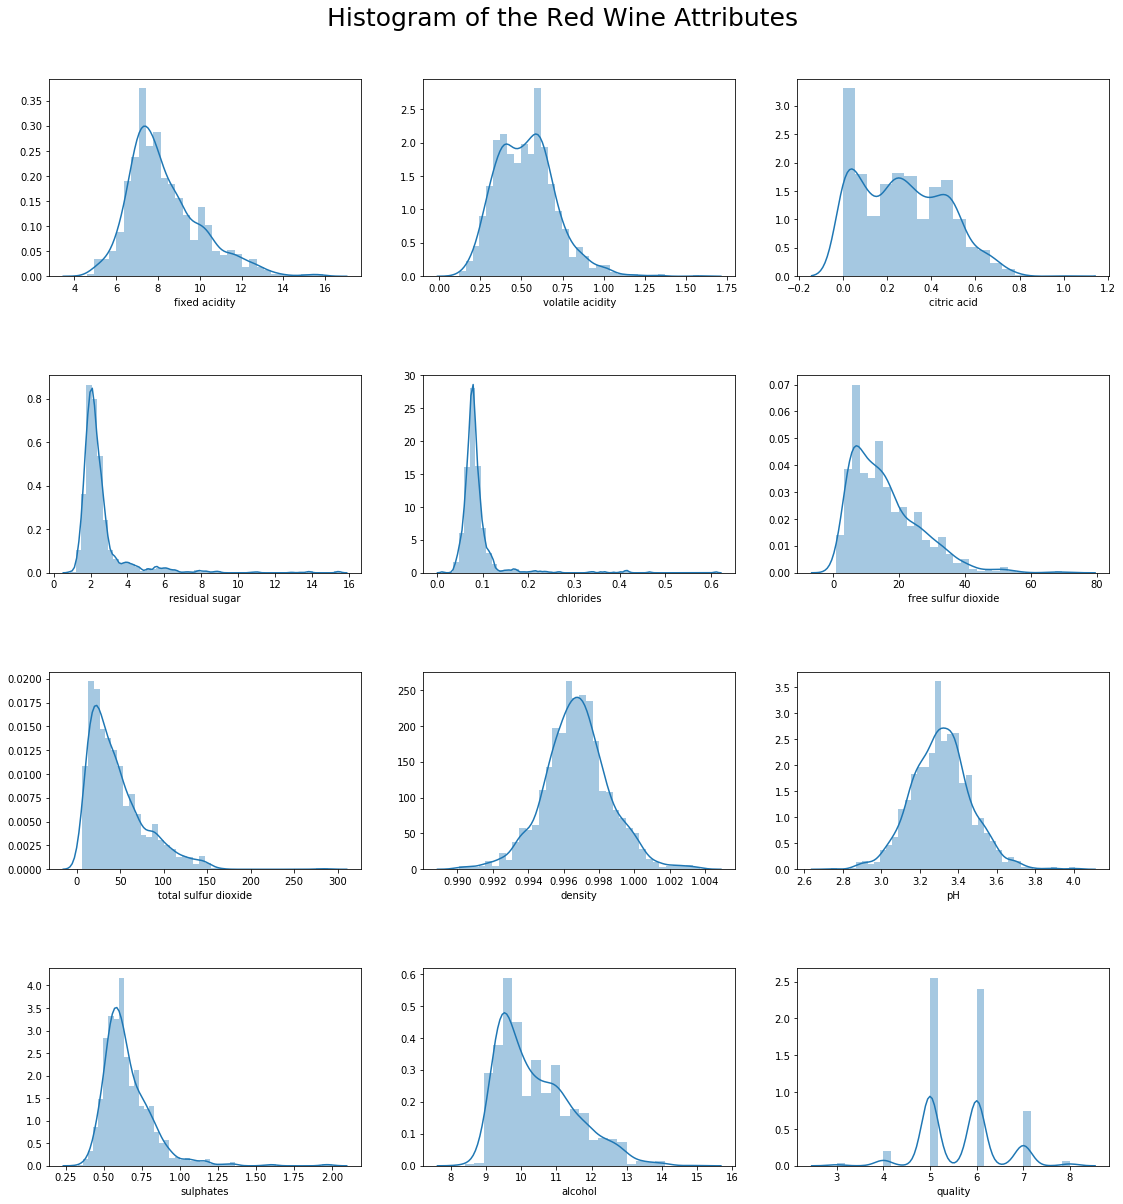

In [24]:
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 19):
    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=25, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        sns.distplot(reddf.iloc[:, i], ax=ax)
    # Show the plot
    plt.show()
    
subplot_hist(reddf.iloc[:, :-1], row = 4, column = 3, title = "Histogram of the Red Wine Attributes")

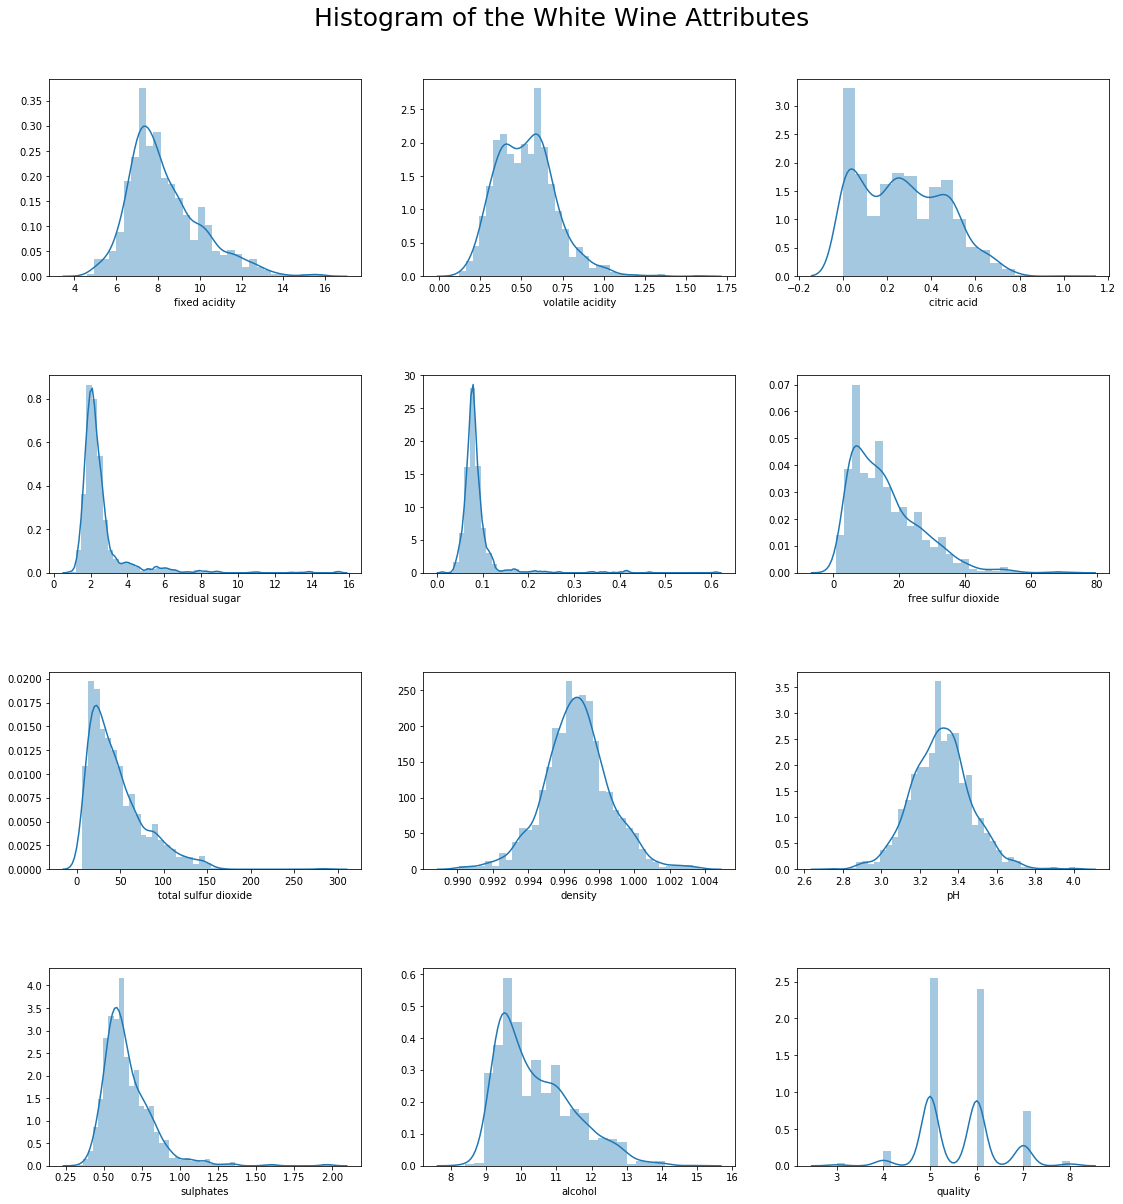

In [25]:
subplot_hist(whitedf.iloc[:, :-1], row = 4, column = 3, title = "Histogram of the White Wine Attributes")

In [26]:
# Computing the skewness into dataFrame
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skewed")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Red Wine
print('Red Wine Skewness')
skewness_check(reddf.iloc[:, :-1])

Red Wine Skewness


,Column,Skewness,Skew Category
0,fixed acidity,0.981829,Heavily Skewed
1,volatile acidity,0.670962,Heavily Skewed
2,citric acid,0.318039,Light Skewed
3,residual sugar,4.536395,Heavily Skewed
4,chlorides,5.675017,Heavily Skewed
5,free sulfur dioxide,1.249394,Heavily Skewed
6,total sulfur dioxide,1.514109,Heavily Skewed
7,density,0.071221,Light Skewed
8,pH,0.193502,Light Skewed
9,sulphates,2.426393,Heavily Skewed


In [27]:
# Skewness for White Wine
print('White Wine Skewness')
skewness_check(whitedf.iloc[:, :-1])

White Wine Skewness


,Column,Skewness,Skew Category
0,fixed acidity,0.647553,Heavily Skewed
1,volatile acidity,1.576497,Heavily Skewed
2,citric acid,1.281528,Heavily Skewed
3,residual sugar,1.076764,Heavily Skewed
4,chlorides,5.021792,Heavily Skewed
5,free sulfur dioxide,1.406314,Heavily Skewed
6,total sulfur dioxide,0.390590,Light Skewed
7,density,0.977474,Heavily Skewed
8,pH,0.457642,Light Skewed
9,sulphates,0.976894,Heavily Skewed


<h2>Box Plots</h2>

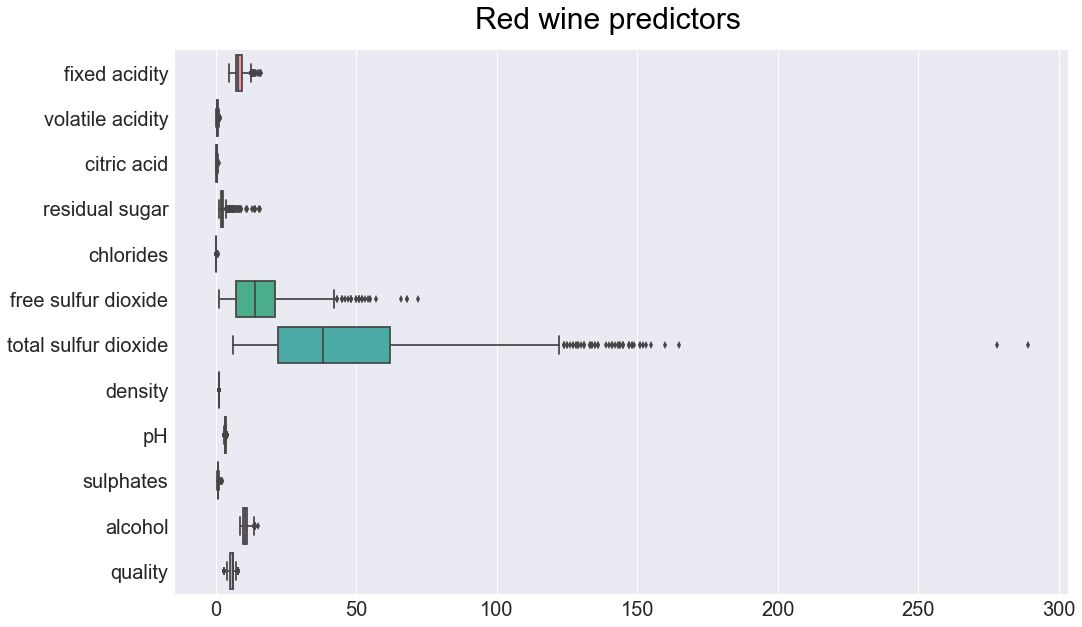

In [28]:
# Custom boxplot
def box_plot(data, height = 10, width = 16, title = "Boxplot"):
    # Make the figure object
    plt.figure(figsize=(width, height))
    # Add title
    plt.suptitle(title, y = 0.94, fontsize = 30)
    # Scale the font size
    sns.set(font_scale = 2)
    # Create the boxplot
    sns.boxplot(data = data, orient = "h")
    
box_plot(data = reddf, title = "Red wine predictors")

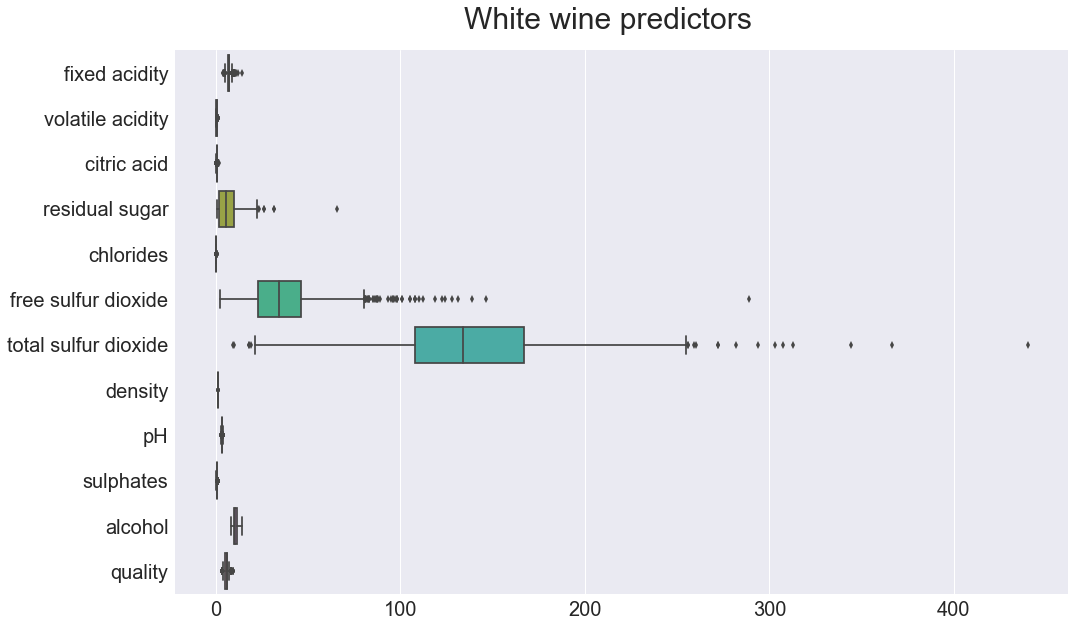

In [29]:
box_plot(data = whitedf, title = "White wine predictors")

<h2>Correlation Between Target Variable and Predictor Attributes</h2>

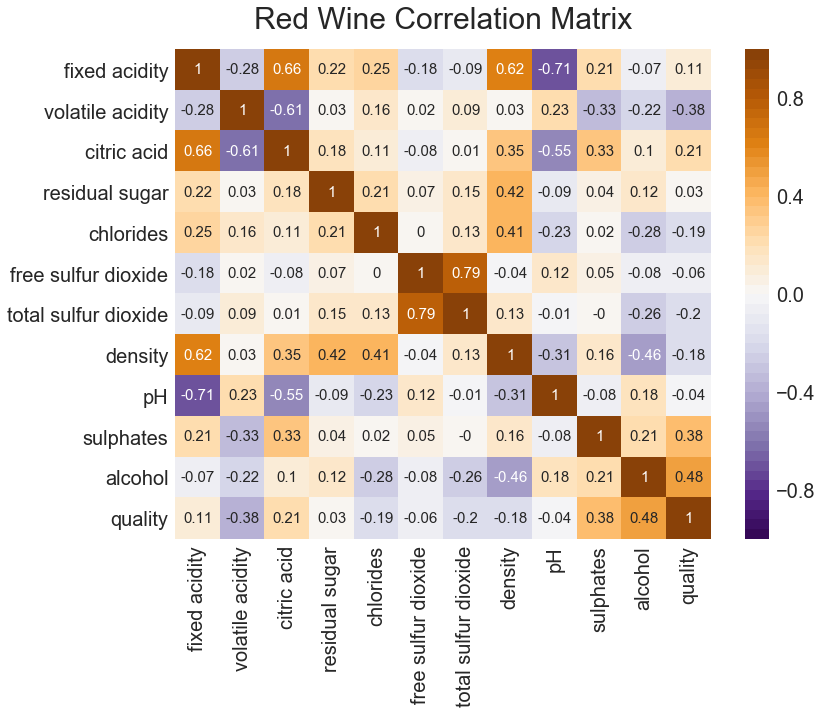

In [30]:
def confusion_matrix_plot(data, title = "Red Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 30)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(reddf, title = "Red Wine Correlation Matrix")

In [31]:
reddf.corr(method ="spearman")['quality'].sort_values(ascending=False)


quality                 1.000000
alcohol                 0.478532
sulphates               0.377060
citric acid             0.213481
fixed acidity           0.114084
residual sugar          0.032048
pH                     -0.043672
free sulfur dioxide    -0.056901
density                -0.177074
chlorides              -0.189922
total sulfur dioxide   -0.196735
volatile acidity       -0.380647
Name: quality, dtype: float64

We want to find values that are either highly positively correlated (close to 1) or highly negatively correlated (close to negative 1). Looking at the bottom row (or rightmost column), we can see the correlation coefficients between the target variable, quality, and the indicator variables.  Of course, quality is perfectly correlated with itself, so we will ignore that. 

The most significant correlation coeffients for red wine quality in descending order are (1) alcohol (0.48), (2) sulfates (0.38), (3) volatile acidity (-0.38), (4) citric acid (0.21), (5) total sulfur dioxide (-0.2), (6) chlorides (-0.19), (7) density (-0.18), (8) fixed acidity (0.11),(9) free sulfur dioxide (-0.06), (10) pH (-0.04), and (11) residual sugar (0.03).

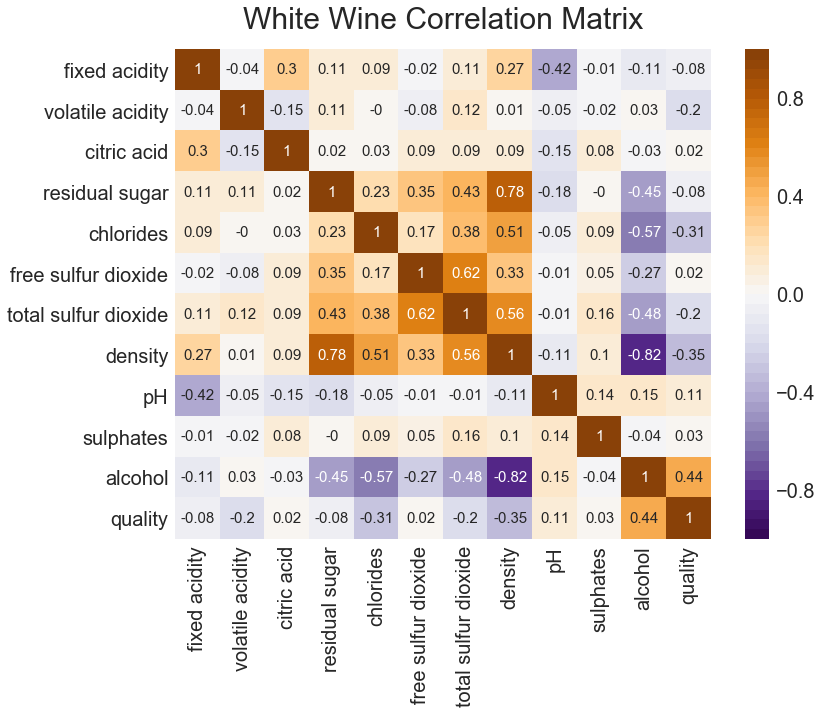

In [32]:
confusion_matrix_plot(whitedf, title = "White Wine Correlation Matrix")

In [33]:
whitedf.corr(method ="spearman")['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.440369
pH                      0.109362
sulphates               0.033319
free sulfur dioxide     0.023713
citric acid             0.018333
residual sugar         -0.082070
fixed acidity          -0.084485
volatile acidity       -0.196562
total sulfur dioxide   -0.196680
chlorides              -0.314488
density                -0.348351
Name: quality, dtype: float64

The most significant correlation coeffients for white wine quality in descending order are (1) alcohol (0.44), (2) density (-0.35), (3) chlorides (-0.31), (4) volatile acidity (-0.2), (5) total sulfur dioxide (-0.2), (6) pH (-.11), (7) residual sugar (-0.08), (8) free acidity (-0.08),(9) sulfates (0.03), (10) citric acid (0.02), and (11) free sulfur dioxide (0.02).

<h2>Red Wine Quality Indicators</h2>

<h3>Alcohol</h3>

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Red Wine Quality Dataset'),
 Text(0.5,1,'Alcohol percent in different dataset quality types')]

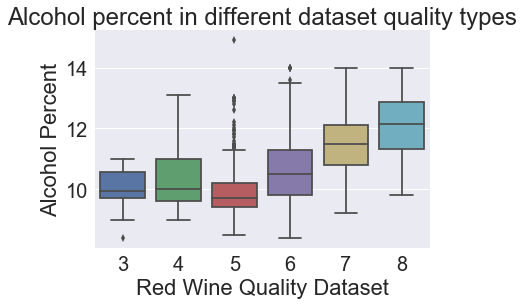

In [34]:
bx = sns.boxplot(x='quality', y='alcohol', data = reddf)
bx.set(xlabel='Red Wine Quality Dataset', ylabel='Alcohol Percent', title='Alcohol percent in different dataset quality types')




[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Red Wine Quality Dataset'),
 Text(0.5,1,'Alcohol percent in different dataset rating categories')]

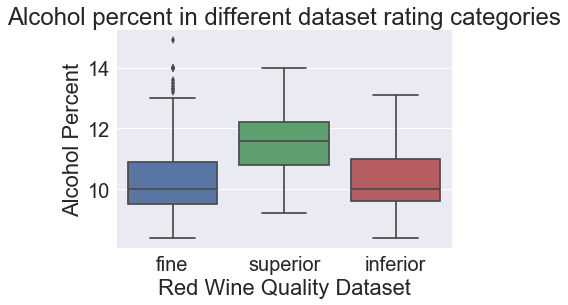

In [35]:
bx = sns.boxplot(x='rating', y='alcohol', data = reddf)
bx.set(xlabel='Red Wine Quality Dataset', ylabel='Alcohol Percent', title='Alcohol percent in different dataset rating categories')



<h3>Sulphates</h3>

[Text(0,0.5,'Sulphates'),
 Text(0.5,0,'Red Wine Quality Dataset'),
 Text(0.5,1,'Sulphates in different dataset quality types')]

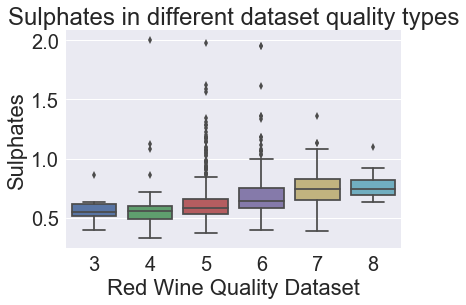

In [36]:
bx = sns.boxplot(x='quality', y='sulphates', data = reddf)
bx.set(xlabel='Red Wine Quality Dataset', ylabel='Sulphates', title='Sulphates in different dataset quality types')



[Text(0,0.5,'Sulphates'),
 Text(0.5,0,'Red Wine Quality Dataset'),
 Text(0.5,1,'Sulphates in different dataset rating categories')]

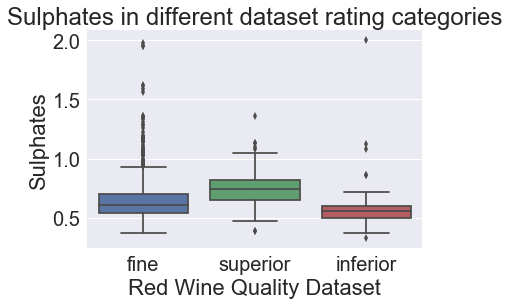

In [37]:
bx = sns.boxplot(x='rating', y='sulphates', data = reddf)
bx.set(xlabel='Red Wine Quality Dataset', ylabel='Sulphates', title='Sulphates in different dataset rating categories')



<h3>Volatile Acidity</h3>

[Text(0,0.5,'Volatile Acidity'),
 Text(0.5,0,'Red Wine Quality Dataset'),
 Text(0.5,1,'Volatile Acidity of different dataset quality types')]

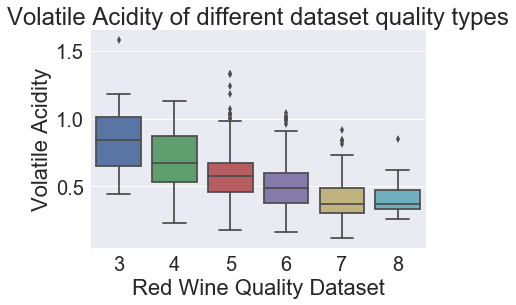

In [38]:
bx = sns.boxplot(x='quality', y='volatile acidity', data = reddf)
bx.set(xlabel='Red Wine Quality Dataset', ylabel='Volatile Acidity', title='Volatile Acidity of different dataset quality types')



[Text(0,0.5,'Volatile Acidity'),
 Text(0.5,0,'Red Wine Quality Dataset'),
 Text(0.5,1,'Volatile Acidity of different dataset rating categories')]

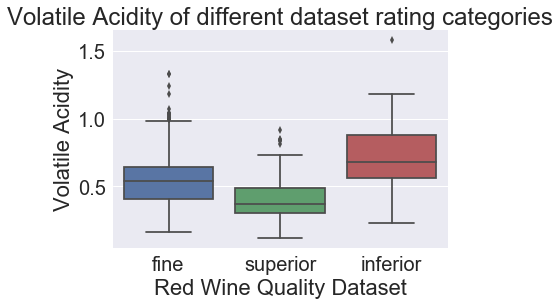

In [39]:
bx = sns.boxplot(x='rating', y='volatile acidity', data = reddf)
bx.set(xlabel='Red Wine Quality Dataset', ylabel='Volatile Acidity', title='Volatile Acidity of different dataset rating categories')



<h3>Citric Acid</h3>

[Text(0,0.5,'Citric Acid'),
 Text(0.5,0,'Red Wine Quality Dataset'),
 Text(0.5,1,'Citric Acid in different dataset quality types')]

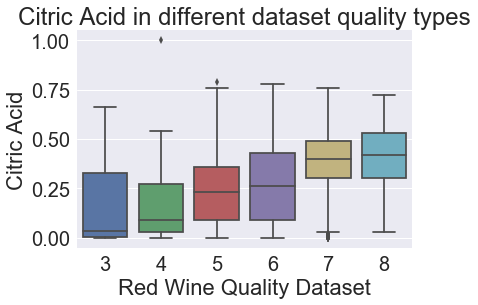

In [40]:
bx = sns.boxplot(x='quality', y='citric acid', data = reddf)
bx.set(xlabel='Red Wine Quality Dataset', ylabel='Citric Acid', title='Citric Acid in different dataset quality types')



[Text(0,0.5,'Citric Acid'),
 Text(0.5,0,'Red Wine Quality Dataset'),
 Text(0.5,1,'Citric Acid in different dataset rating categories')]

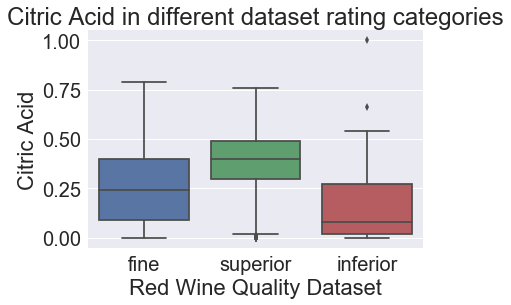

In [41]:
bx = sns.boxplot(x='rating', y='citric acid', data = reddf)
bx.set(xlabel='Red Wine Quality Dataset', ylabel='Citric Acid', title='Citric Acid in different dataset rating categories')



<h3>Total Sulphur Dioxide</h3>

[Text(0,0.5,'Total Sulphur Dioxide'),
 Text(0.5,0,'Red Wine Quality Dataset'),
 Text(0.5,1,'Total Sulphur Dioxide of different dataset quality types')]

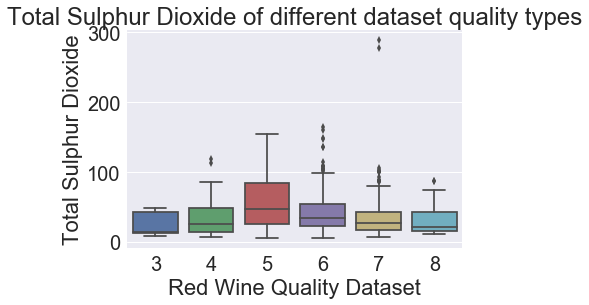

In [42]:
bx = sns.boxplot(x='quality', y='total sulfur dioxide', data = reddf)
bx.set(xlabel='Red Wine Quality Dataset', ylabel='Total Sulphur Dioxide', title='Total Sulphur Dioxide of different dataset quality types')



[Text(0,0.5,'Total Sulfur Dioxide'),
 Text(0.5,0,'Red Wine Quality Dataset'),
 Text(0.5,1,'Total Sulfur Dioxide in different dataset rating categories')]

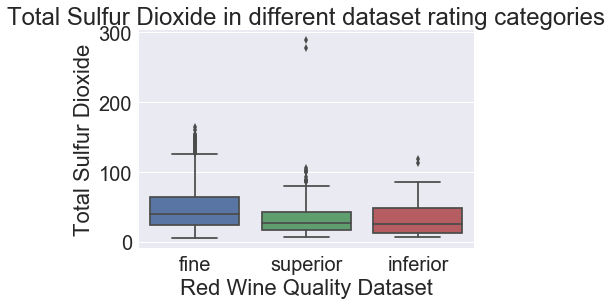

In [43]:
bx = sns.boxplot(x='rating', y='total sulfur dioxide', data = reddf)
bx.set(xlabel='Red Wine Quality Dataset', ylabel='Total Sulfur Dioxide', title='Total Sulfur Dioxide in different dataset rating categories')



<h3>Chlorides</h3>

[Text(0,0.5,'Chlorides'),
 Text(0.5,0,'Red Wine Quality Dataset'),
 Text(0.5,1,'Chlorides percent in different dataset quality types')]

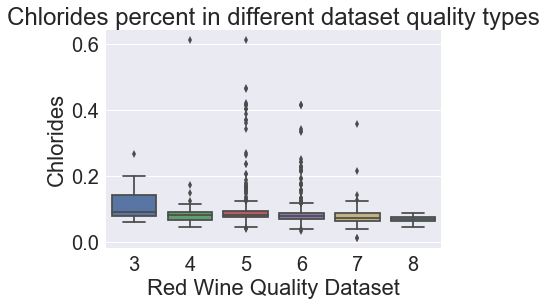

In [44]:
bx = sns.boxplot(x='quality', y='chlorides', data = reddf)
bx.set(xlabel='Red Wine Quality Dataset', ylabel='Chlorides', title='Chlorides percent in different dataset quality types')



[Text(0,0.5,'Chlorides'),
 Text(0.5,0,'Red Wine Quality Dataset'),
 Text(0.5,1,'Chlorides percent in different dataset rating categories')]

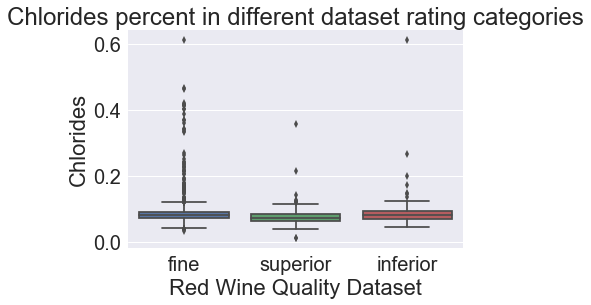

In [45]:
bx = sns.boxplot(x='rating', y='chlorides', data = reddf)
bx.set(xlabel='Red Wine Quality Dataset', ylabel='Chlorides', title='Chlorides percent in different dataset rating categories')



<h3>Density</h3>

[Text(0,0.5,'Density'),
 Text(0.5,0,'Red Wine Quality Dataset'),
 Text(0.5,1,'Density of different dataset quality types')]

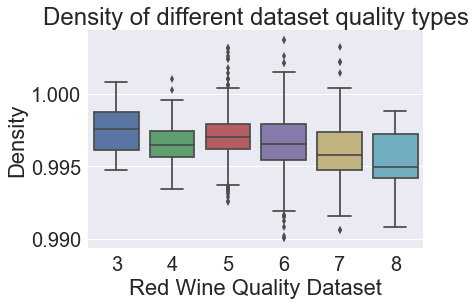

In [46]:
bx = sns.boxplot(x='quality', y='density', data = reddf)
bx.set(xlabel='Red Wine Quality Dataset', ylabel='Density', title='Density of different dataset quality types')



[Text(0,0.5,'Density'),
 Text(0.5,0,'Red Wine Quality Dataset'),
 Text(0.5,1,'Density of different dataset rating categories')]

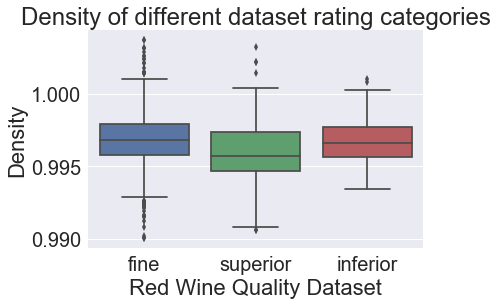

In [47]:
bx = sns.boxplot(x='rating', y='density', data = reddf)
bx.set(xlabel='Red Wine Quality Dataset', ylabel='Density', title='Density of different dataset rating categories')



<h3>Fixed Acidity</h3>

[Text(0,0.5,'Fixed Acidity'),
 Text(0.5,0,'Red Wine Quality Dataset'),
 Text(0.5,1,'Fixed Acidity of different dataset quality types')]

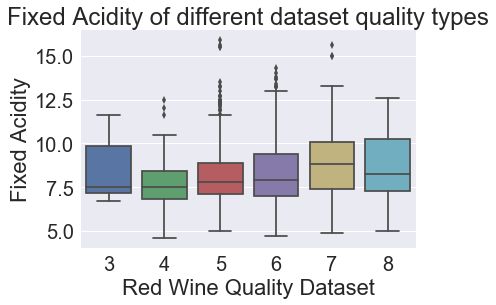

In [48]:
bx = sns.boxplot(x='quality', y='fixed acidity', data = reddf)
bx.set(xlabel='Red Wine Quality Dataset', ylabel='Fixed Acidity', title='Fixed Acidity of different dataset quality types')



[Text(0,0.5,'Fixed Acidity'),
 Text(0.5,0,'Red Wine Quality Dataset'),
 Text(0.5,1,'Fixed Acidity of different dataset rating categories')]

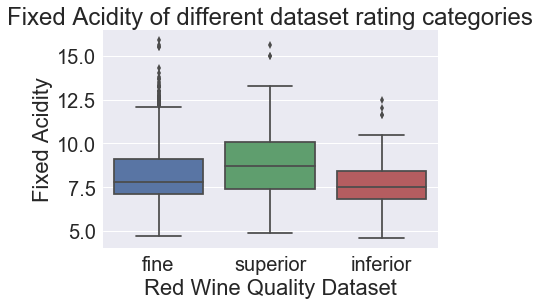

In [49]:
bx = sns.boxplot(x='rating', y='fixed acidity', data = reddf)
bx.set(xlabel='Red Wine Quality Dataset', ylabel='Fixed Acidity', title='Fixed Acidity of different dataset rating categories')



<h2>White Wine Quality Indicators</h2>

<h3>Alcohol</h3>

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'White Wine Quality Dataset'),
 Text(0.5,1,'Alcohol percent in different dataset quality types')]

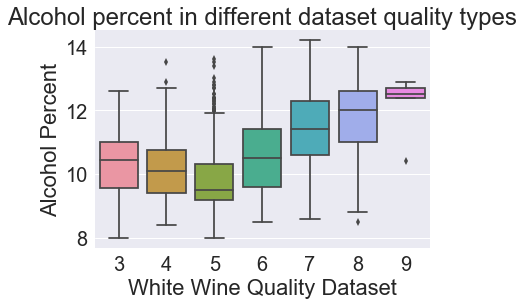

In [50]:
bx = sns.boxplot(x='quality', y='alcohol', data = whitedf)
bx.set(xlabel='White Wine Quality Dataset', ylabel='Alcohol Percent', title='Alcohol percent in different dataset quality types')


[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'White Wine Quality Dataset'),
 Text(0.5,1,'Alcohol percent in different dataset rating categories')]

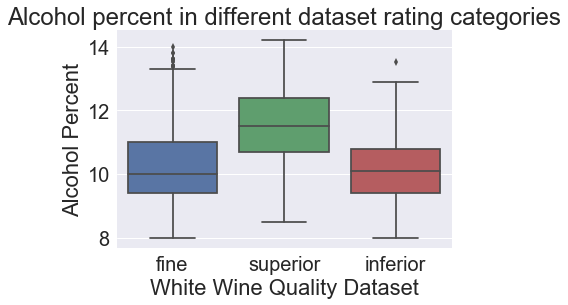

In [51]:
bx = sns.boxplot(x='rating', y='alcohol', data = whitedf)
bx.set(xlabel='White Wine Quality Dataset', ylabel='Alcohol Percent', title='Alcohol percent in different dataset rating categories')



<h3>Density</h3>

[Text(0,0.5,'Density'),
 Text(0.5,0,'White Wine Quality Dataset'),
 Text(0.5,1,'Density of different dataset quality types')]

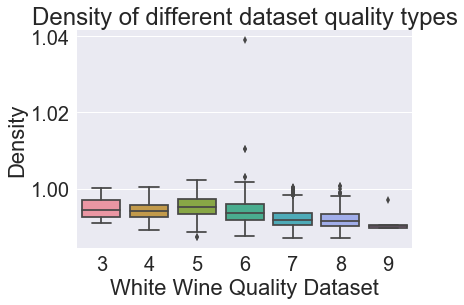

In [52]:
bx = sns.boxplot(x='quality', y='density', data = whitedf)
bx.set(xlabel='White Wine Quality Dataset', ylabel='Density', title='Density of different dataset quality types')


[Text(0,0.5,'Density'),
 Text(0.5,0,'White Wine Quality Dataset'),
 Text(0.5,1,'Density of different dataset rating categories')]

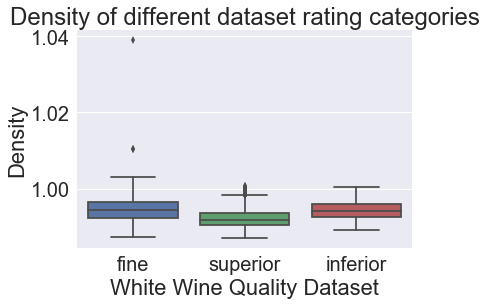

In [53]:
bx = sns.boxplot(x='rating', y='density', data = whitedf)
bx.set(xlabel='White Wine Quality Dataset', ylabel='Density', title='Density of different dataset rating categories')



<h3>Chlorides</h3>

[Text(0,0.5,'Chlorides'),
 Text(0.5,0,'White Wine Quality Dataset'),
 Text(0.5,1,'Chlorides of different dataset quality types')]

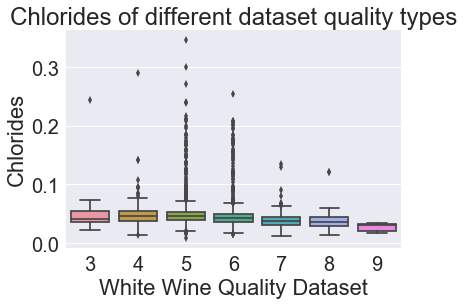

In [54]:
bx = sns.boxplot(x='quality', y='chlorides', data = whitedf)
bx.set(xlabel='White Wine Quality Dataset', ylabel='Chlorides', title='Chlorides of different dataset quality types')


[Text(0,0.5,'Density'),
 Text(0.5,0,'White Wine Quality Dataset'),
 Text(0.5,1,'Chlorides of different dataset rating categories')]

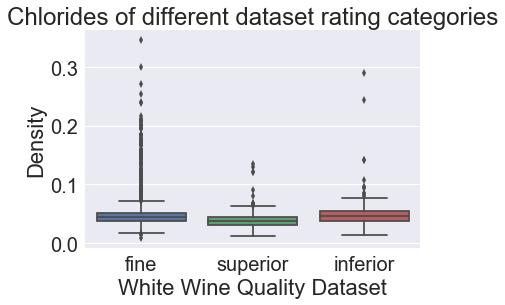

In [55]:
bx = sns.boxplot(x='rating', y='chlorides', data = whitedf)
bx.set(xlabel='White Wine Quality Dataset', ylabel='Density', title='Chlorides of different dataset rating categories')



<h3>Volatile Acidity</h3>

[Text(0,0.5,'Volatile Acidity'),
 Text(0.5,0,'White Wine Quality Dataset'),
 Text(0.5,1,'Volatile Acidity of different dataset quality types')]

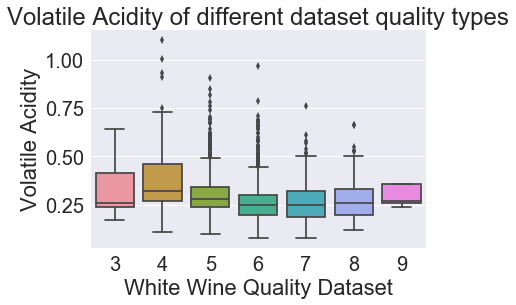

In [56]:
bx = sns.boxplot(x='quality', y='volatile acidity', data = whitedf)
bx.set(xlabel='White Wine Quality Dataset', ylabel='Volatile Acidity', title='Volatile Acidity of different dataset quality types')


[Text(0,0.5,'Volatile Acidity'),
 Text(0.5,0,'White Wine Quality Dataset'),
 Text(0.5,1,'Volatile Acidity of different dataset rating categories')]

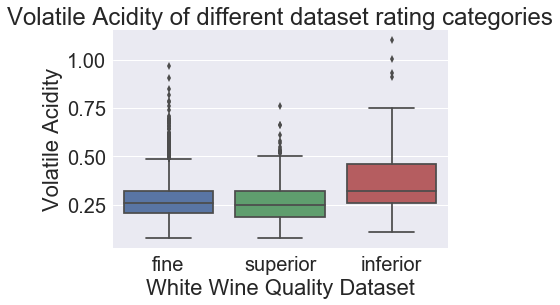

In [57]:
bx = sns.boxplot(x='rating', y='volatile acidity', data = whitedf)
bx.set(xlabel='White Wine Quality Dataset', ylabel='Volatile Acidity', title='Volatile Acidity of different dataset rating categories')



<h3>Total Sulfur Dioxide</h3>

[Text(0,0.5,'total sulfur dioxide'),
 Text(0.5,0,'White Wine Quality Dataset'),
 Text(0.5,1,'Total Sulfur Dioxide of different dataset quality types')]

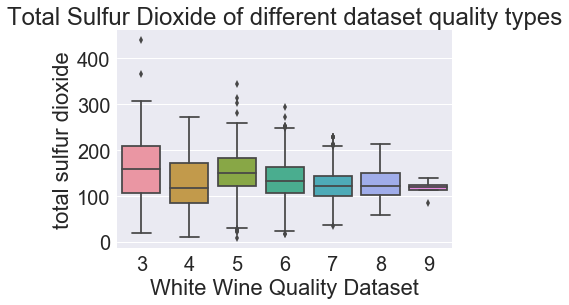

In [58]:
bx = sns.boxplot(x='quality', y='total sulfur dioxide', data = whitedf)
bx.set(xlabel='White Wine Quality Dataset', ylabel='total sulfur dioxide', title='Total Sulfur Dioxide of different dataset quality types')


[Text(0,0.5,'Total Sulfur Dioxide'),
 Text(0.5,0,'White Wine Quality Dataset'),
 Text(0.5,1,'Total Sulfur Dioxide of different dataset rating categories')]

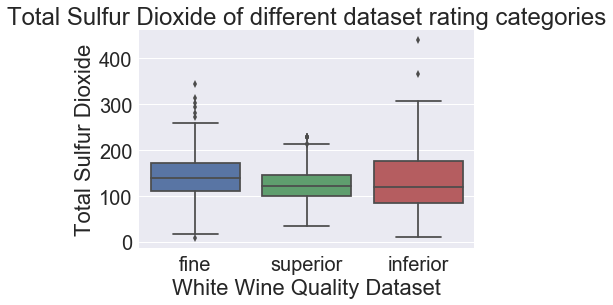

In [59]:
bx = sns.boxplot(x='rating', y='total sulfur dioxide', data = whitedf)
bx.set(xlabel='White Wine Quality Dataset', ylabel='Total Sulfur Dioxide', title='Total Sulfur Dioxide of different dataset rating categories')



<h3>pH</h3>

[Text(0,0.5,'pH'),
 Text(0.5,0,'White Wine Quality Dataset'),
 Text(0.5,1,'pH of different dataset quality types')]

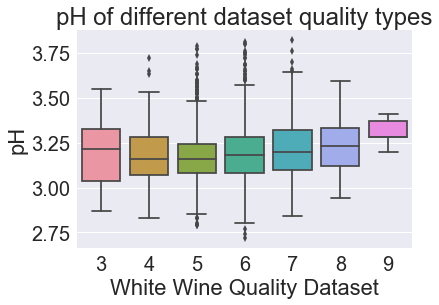

In [60]:
bx = sns.boxplot(x='quality', y='pH', data = whitedf)
bx.set(xlabel='White Wine Quality Dataset', ylabel='pH', title='pH of different dataset quality types')


[Text(0,0.5,'pH'),
 Text(0.5,0,'White Wine Quality Dataset'),
 Text(0.5,1,'pH of different dataset rating categories')]

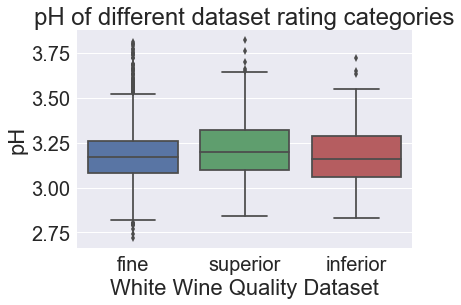

In [61]:
bx = sns.boxplot(x='rating', y='pH', data = whitedf)
bx.set(xlabel='White Wine Quality Dataset', ylabel='pH', title='pH of different dataset rating categories')



<h2>Next Steps</h2>

Based on the EDA of the red and white wine data, I will conduct regression analysis on the red wine data using the alcohol, sulfates, volatile acidity, citric acid, total sulfur dioxide, chlorides, density, and fixed acidity.

And on the white wine data using the alcohol, density, chlorides, volatile acidity, total sulfur dioxide, and pH attributes.